In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "src_py/")
import data_utils as dt
import plot_utils as pl_ut

### Metadata

In [2]:
metadata = pd.read_csv('metadata.tsv', sep='\t', index_col=0)
metadata

,group_index,patient,cell,time_id,time,repl_count
pat1_t1_mc,9,1,m,1,2010,5
pat1_t2_mc,6,1,m,2,2020,5
pat1_t1_pc,12,1,p,1,jun2018,2
pat1_t2_pc,13,1,p,2,nov2018,2
pat1_t3_pc,3,1,p,3,sep2020,7
pat1_t4_pc,11,1,p,4,feb2021,7
pat2_t1_mc,2,2,m,1,2014,5
pat2_t2_mc,8,2,m,2,may2020,5
pat2_t3_mc,7,2,m,3,jul2020,5
pat2_t1_pc,5,2,p,1,2014,1


### Importing frames

In [3]:
# full sample 
sample_name = 'pat1_t4_pc'
frame = pd.read_csv('sequences/'+sample_name+'.tsv', sep='\t', index_col=0, low_memory=False)

In [4]:
frame

,sequence,v_call,chain,j_call,sequence_alignment,germline_alignment,junction,junction_aa,locus,c_call,...,j_germline_start,j_germline_end,cell_id,n_seqs_in_cell,paired_seq,pair_count,pat_heavy_id,pat_pairs_id,familiy_heavy,familiy_pairs
sequence_id,,,,,,,,,,,,,,,,,,,,,
TCTATTGGTCTGCCAG-1_r4_contig_1,AAAAAAGCTCAGCTCTACCCTTGCCTTGACTGATCAGGACTCCTCA...,IGKV2-30*02,L,IGKJ2*01,GATGTTGTGATGACTCAGTCTCCACTCTCCCTGCCCGTCACCCTTG...,GATGTTGTGATGACTCAGTCTCCACTCTCCCTGCCCGTCACCCTTG...,TGCATGCAAGCTACACACTGGCCGTACACCTTT,CMQATHWPYTF,IGK,IGKC,...,2,39,TCTATTGGTCTGCCAG-1_r4,1,NaN,1,TCTATTGGTCTGCCAG-1_r4_pat1_t4_pc_contig_1,TCTATTGGTCTGCCAG-1_r4_pat1_t4_pc_contig_1,NaN,NaN
GAAATGATCAGAAATG-1_r2_contig_1,AAAAAGCTCAGCTCTACCCTTGCCTTGACTGATCAGGACTCCTCAG...,IGKV2-30*01,L,IGKJ5*01,GATGTCGTGGTGACTCAGTCTCCACCCTCCCTGCCCGTCACCCTTG...,GATGTTGTGATGACTCAGTCTCCACTCTCCCTGCCCGTCACCCTTG...,TGCATGCAAGGTAAACACTGGCCCTCCTTC,CMQGKHWPSF,IGK,IGKC,...,6,38,GAAATGATCAGAAATG-1_r2,1,NaN,1,GAAATGATCAGAAATG-1_r2_pat1_t4_pc_contig_1,GAAATGATCAGAAATG-1_r2_pat1_t4_pc_contig_1,NaN,NaN
CTACATTCACCTTGTC-1_r5_contig_1,AAAAAGCTCAGCTCTACCCTTGCCTTGACTGATCAGGACTCCTCAG...,IGKV2-30*01,L,IGKJ5*01,GATGTTGTGATGACTCAGTCTCCACTCTCCCTGCCCGTCACCCTTG...,GATGTTGTGATGACTCAGTCTCCACTCTCCCTGCCCGTCACCCTTG...,TGCATGCAAGGTACATACTTGCCGATTATTTTC,CMQGTYLPIIF,IGK,IGKC,...,8,38,CTACATTCACCTTGTC-1_r5,1,NaN,1,CTACATTCACCTTGTC-1_r5_pat1_t4_pc_contig_1,CTACATTCACCTTGTC-1_r5_pat1_t4_pc_contig_1,NaN,NaN
GAAACTCTCGTCTGAA-1_r3_contig_1,AAAAGAGGTTCTTTCTCTGGGATGTGGCATGAGCAAAACTGACAAG...,IGKV6D-21*02,L,IGKJ4*01,GAAATTGTGCTGACTCAGTCTCCAGACTTCCAGTCTGTGACTCCAA...,GAAATTGTGCTGACTCAGTCTCCAGACTTTCAGTCTGTGACTCCAA...,TGTCACCAGAGTTTTAGTTTCCCCCTCACTTTC,CHQSFSFPLTF,IGK,IGKC,...,2,35,GAAACTCTCGTCTGAA-1_r3,1,NaN,1,GAAACTCTCGTCTGAA-1_r3_pat1_t4_pc_contig_1,GAAACTCTCGTCTGAA-1_r3_pat1_t4_pc_contig_1,NaN,NaN
TGACTAGCAACTGCGC-1_r1_contig_1,AAAAGAGGTTCTTTCTCTGGGATGTGGCATGAGCAAAACTGACAAG...,IGKV6-21*01,L,IGKJ3*01,GAAATTGTGCTGACTCAGTCTCCAGAATTTCAGTCTGTGACTCCTA...,GAAATTGTGCTGACTCAGTCTCCAGACTTTCAGTCTGTGACTCCAA...,TGTCATCAGAGTAGTACTTTACGAGGCACTTTC,CHQSSTLRGTF,IGK,IGKC,...,4,38,TGACTAGCAACTGCGC-1_r1,1,NaN,1,TGACTAGCAACTGCGC-1_r1_pat1_t4_pc_contig_1,TGACTAGCAACTGCGC-1_r1_pat1_t4_pc_contig_1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGCAACACGAAATA-1_r7_contig_2,GAAGAGCTGCTCAGTTAGGACCCAGAGGGAACCATGGAAACCCCAG...,IGKV3-20*01,L,IGKJ3*01,GAAATTGTATTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,GAAATTGTGTTGACGCAGTCTCCAGGCACCCTGTCTTTGTCTCCAG...,TGTCAGCAGTATGGTAGTTCCTCTTTCACTTTC,CQQYGSSSFTF,IGK,IGKC,...,2,38,TTGGCAACACGAAATA-1_r7,3,NaN,1,TTGGCAACACGAAATA-1_r7_pat1_t4_pc_contig_2,TTGGCAACACGAAATA-1_r7_pat1_t4_pc_contig_2,NaN,NaN
TTGGCAACACGAAATA-1_r7_contig_3,GGGGCTGGGGTCTCAGGAGGCAGCGCTCTCGGGACGTCTCCACCAT...,IGLV2-14*03,L,IGLJ2*01,CAGTCTGCCCTGACTCAGCCTGCCTCC...GTGTCTGGGTCTCCTG...,CAGTCTGCCCTGACTCAGCCTGCCTCC...GTGTCTGGGTCTCCTG...,TGCGGCTCATATACAAGCTACAGCAATGTGGCGTTC,CGSYTSYSNVAF,IGL,IGLC2,...,1,38,TTGGCAACACGAAATA-1_r7,3,NaN,1,TTGGCAACACGAAATA-1_r7_pat1_t4_pc_contig_3,TTGGCAACACGAAATA-1_r7_pat1_t4_pc_contig_3,NaN,NaN
TTTATGCCAAGGGTCA-1_r7_contig_1,ACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAAC...,IGHV1-18*04,H,IGHJ4*02,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GACGTGAAGAAGCCTG...,CAGGTTCAGCTGGTGCAGTCTGGAGCT...GAGGTGAAGAAGCCTG...,TGTGCGAGAACAGGACCTTCTAGCAGCAGCTGGCCTGACTACTGG,CARTGPSSSSWPDYW,IGH,IGHA2,...,8,48,TTTATGCCAAGGGTCA-1_r7,3,NaN,1,TTTATGCCAAGGGTCA-1_r7_pat1_t4_pc_contig_1,TTTATGCCAAGGGTCA-1_r7_pat1_t4_pc_contig_1,577.0,NaN


#### Some important fields

In [5]:
# paired_seq: sequence of the opposite chain in the same cell
# if nan the sequence cannot be paired

frame['paired_seq'][frame['paired_seq'].notna()]

sequence_id
GACCAATCATTGTGCA-1_r7_contig_1    GACCAATCATTGTGCA-1_r7_contig_2
GACCAATCATTGTGCA-1_r7_contig_2    GACCAATCATTGTGCA-1_r7_contig_1
AGTGTCACAAATCCGT-1_r1_contig_2    AGTGTCACAAATCCGT-1_r1_contig_1
AGTGTCACAAATCCGT-1_r1_contig_1    AGTGTCACAAATCCGT-1_r1_contig_2
GGGCATCAGACCTAGG-1_r5_contig_1    GGGCATCAGACCTAGG-1_r5_contig_2
                                               ...              
GTGTGCGTCAAGGTAA-1_r4_contig_2    GTGTGCGTCAAGGTAA-1_r4_contig_1
CATGACAAGAATGTTG-1_r4_contig_2    CATGACAAGAATGTTG-1_r4_contig_1
CATGACAAGAATGTTG-1_r4_contig_1    CATGACAAGAATGTTG-1_r4_contig_2
TCACGAAAGATACACA-1_r3_contig_1    TCACGAAAGATACACA-1_r3_contig_2
TCACGAAAGATACACA-1_r3_contig_2    TCACGAAAGATACACA-1_r3_contig_1
Name: paired_seq, Length: 70570, dtype: object

In [6]:
# familiy_pairs: index of the Hilary family computed for paired 
# sequences (using info on both the chains)

# familiy_heavy: index of the Hilary family computed among heavy
# sequences only

print('N. families "pair":', len(np.unique(frame['familiy_pairs'])))
print('N. families "heavy":', len(np.unique(frame['familiy_heavy'])))

N. families "pair": 22945
N. families "heavy": 24125


### Sample family size distribution

In [7]:
pat = 1
fam_type = 'familiy_pairs'

uni_counts, count_cumcounts, samples = [], [], []
for samp in metadata[metadata.patient == pat].index:
    
    f = pd.read_csv('sequences/'+samp+'.tsv', sep='\t', index_col=0, low_memory=False)
    f = f[f.chain == 'H']
    f = f[f[fam_type].notna()]
    
    counts = f.groupby(fam_type).agg({'pair_count' : sum})['pair_count']
    uni_count, count_cumcount = dt.get_cum_counts(counts)
    uni_counts.append(uni_count)
    count_cumcounts.append(count_cumcount)
    samples.append(samp)

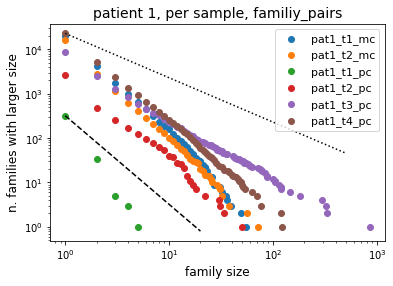

In [8]:
plt.loglog()
plt.title('patient ' +str(pat)+ ', per sample, ' + fam_type, fontsize=14)
plt.xlabel('family size', fontsize=12)
plt.ylabel('n. families with larger size', fontsize=12)
for i, (uni_count, count_cumcount) in enumerate(zip(uni_counts, count_cumcounts)):
    plt.scatter(uni_count, count_cumcount, label=samples[i])
xs = np.linspace(1,500,20)
init_cc = [cc[0] for cc in count_cumcounts]
plt.plot(xs, max(init_cc)*xs**(-1), c='k', ls=':')
xs = np.linspace(1,20,20)
plt.plot(xs, min(init_cc)*xs**(-2), c='k', ls='--')
plt.legend(fontsize=11)

#plt.savefig('plots/families/pat'+str(pat)+'_samples_size_dist_'+fam_type+'.png', dpi=200, facecolor='w')

## Common families between samples

### Between time samples

In [9]:
s1, s2 = 'pat1_t2_mc', 'pat1_t3_pc'
fam_type = 'familiy_pairs'

f1 = dt.read_family_frame(s1, fam_type=fam_type)
f2 = dt.read_family_frame(s2, fam_type=fam_type)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = dt.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

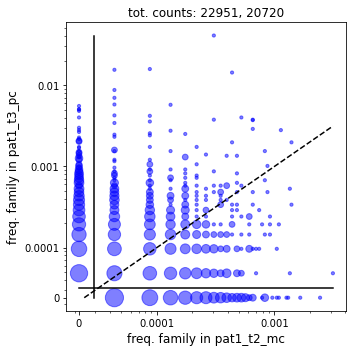

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s1, s2, 10, 400, False)
plt.tight_layout()

### Between replicates

In [11]:
s = 'pat2_t1_mc'
r1, r2 = '1', '2'
fam_type = 'familiy_pairs'

f1 = dt.read_family_frame(s+'_r'+r1, True, fam_type=fam_type)
f2 = dt.read_family_frame(s+'_r'+r2, True, fam_type=fam_type)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = dt.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

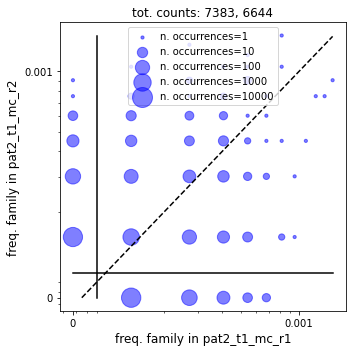

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s+'_r'+r1, s+'_r'+r2, 10, 400, True)
plt.tight_layout()

### Between time samples, undersampled

In [18]:
s1, s2 = 'pat2_t2_mc', 'pat2_t3_mc'
n1, n2 = 6000, 10000
fam_type = 'familiy_pairs'

f1 = dt.read_family_frame(s1, fam_type=fam_type)
f2 = dt.read_family_frame(s2, fam_type=fam_type)
f1 = dt.downsample_frame(f1, n1)
f2 = dt.downsample_frame(f2, n2)
f1_aux = f1.groupby(fam_type).agg({'pair_count':sum})
f2_aux = f2.groupby(fam_type).agg({'pair_count':sum})
merged_counts = pd.merge(f1_aux, f2_aux, on=fam_type, how='outer').fillna(0)
sparse_counts = dt.build_sparse_counts([merged_counts['pair_count_x'], merged_counts['pair_count_y']])

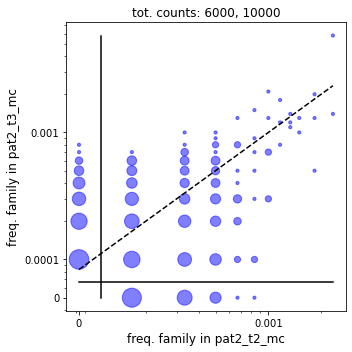

In [19]:
fig, ax = plt.subplots(figsize=(5,5))

ax = pl_ut.plot_scatter(ax, sparse_counts, s1, s2, 10, 400, False)
plt.tight_layout()